# Prodigy Infotech Internship Task 3 - Decision Tree Classifier

#### Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

### Importing the neccesary modules

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Reading the Data set

In [3]:
df = pd.read_csv('bank-additional.csv', delimiter = ';')
df.rename(columns = {'y':'deposit'},inplace = True)


In [4]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [5]:
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
4109,63,retired,married,high.school,no,no,no,cellular,oct,wed,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.740,5017.5,no
4110,53,housemaid,divorced,basic.6y,unknown,unknown,unknown,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
4111,30,technician,married,university.degree,no,no,yes,cellular,jun,fri,...,1,999,1,failure,-1.7,94.055,-39.8,0.748,4991.6,no
4112,31,technician,single,professional.course,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
4113,31,admin.,single,university.degree,no,yes,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [6]:
df.shape

(4119, 21)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [8]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [10]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Data Cleaning and Data Preprocessing

In [12]:
#Handling Duplicate values
df.duplicated().sum()

np.int64(0)

In [13]:
#Handling Null/Missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

### Extracting Numerical and Categorical Columns

In [14]:
cat_cols = df.select_dtypes(include = 'object').columns
num_cols = df.select_dtypes(exclude = 'object').columns


In [15]:
cat_cols, num_cols

(Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'day_of_week', 'poutcome', 'deposit'],
       dtype='object'),
 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
       dtype='object'))

### Descriptive Statistical Analysis

In [16]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [17]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


### Exploratory Data Analysis (EDA)

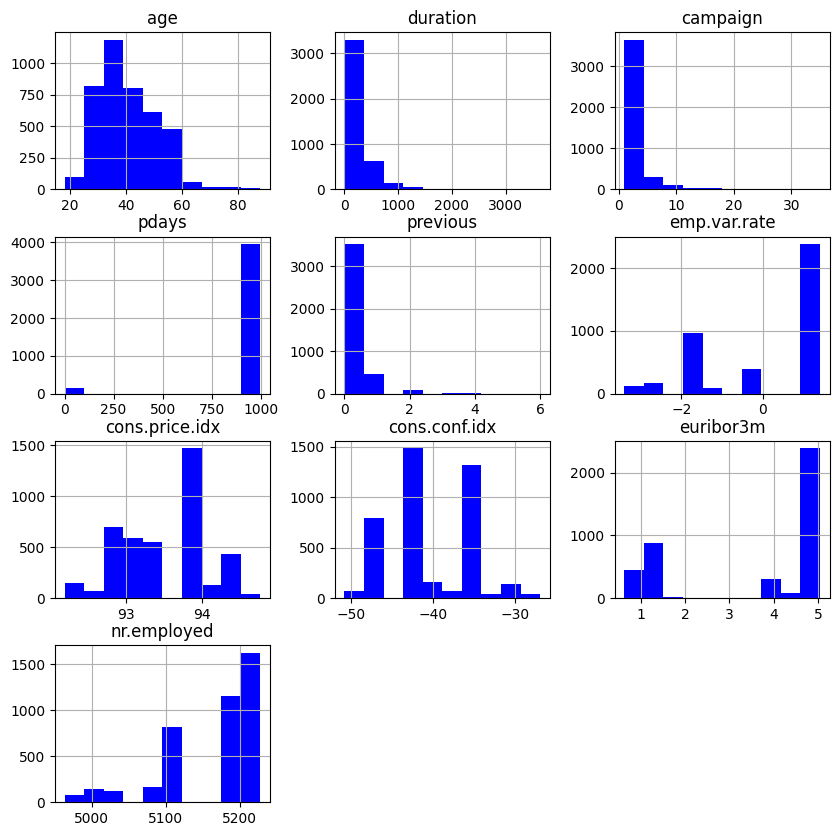

In [18]:
#Visualizing Numerical Columns using Histplot
df.hist(figsize=(10,10), color = 'blue')
plt.show()

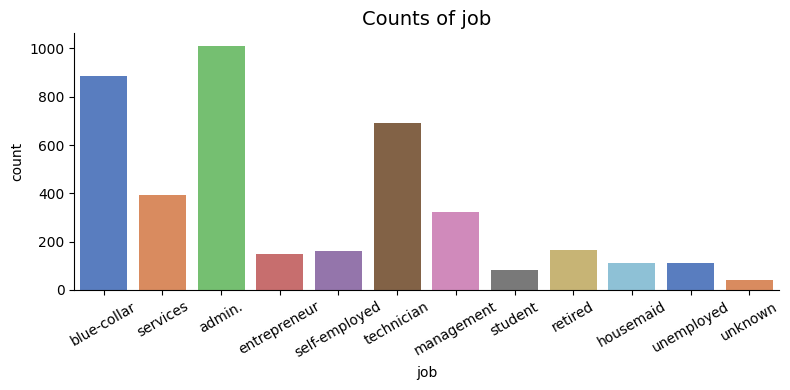

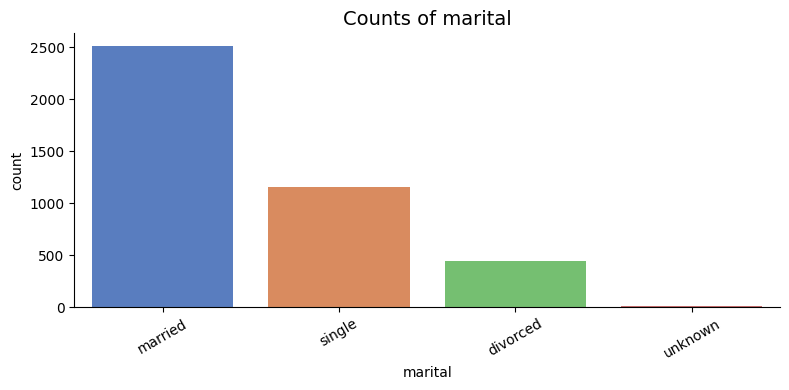

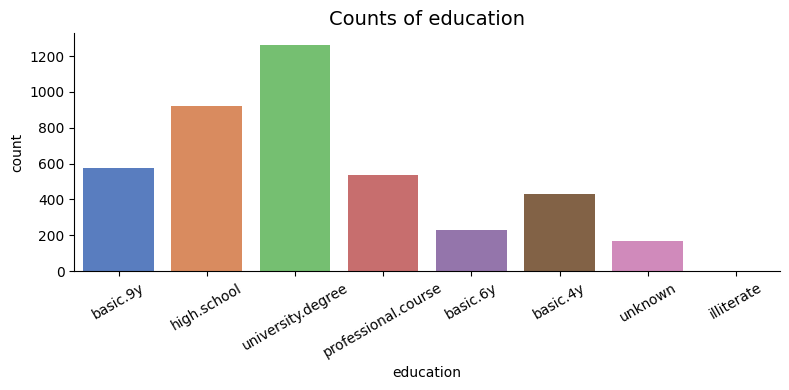

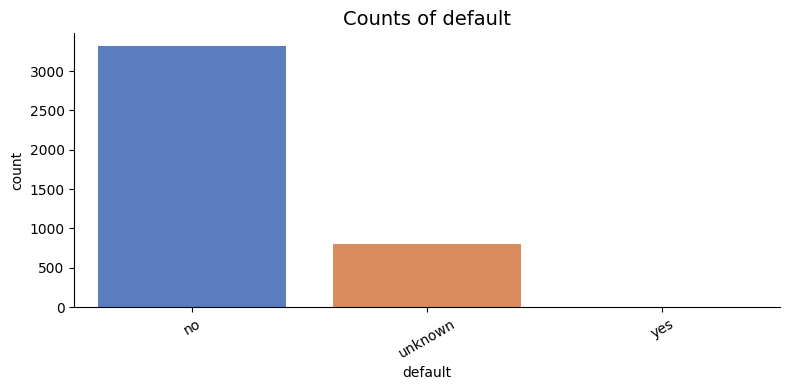

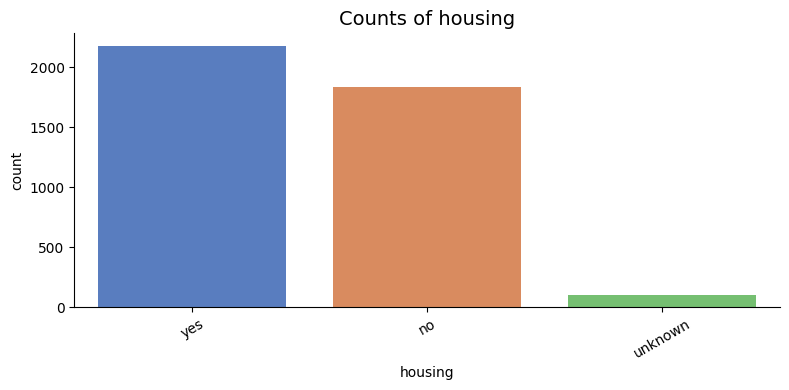

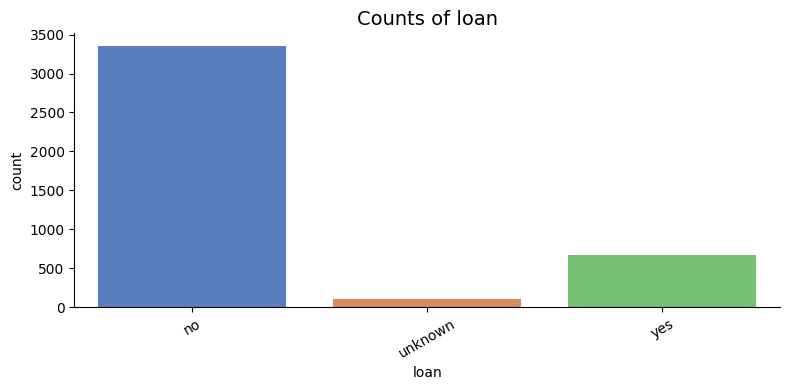

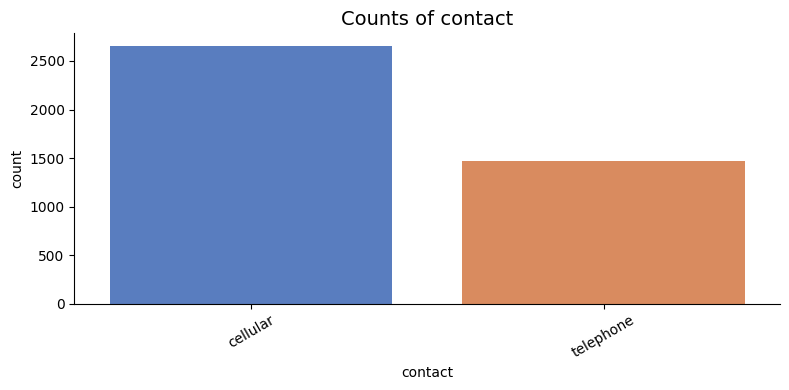

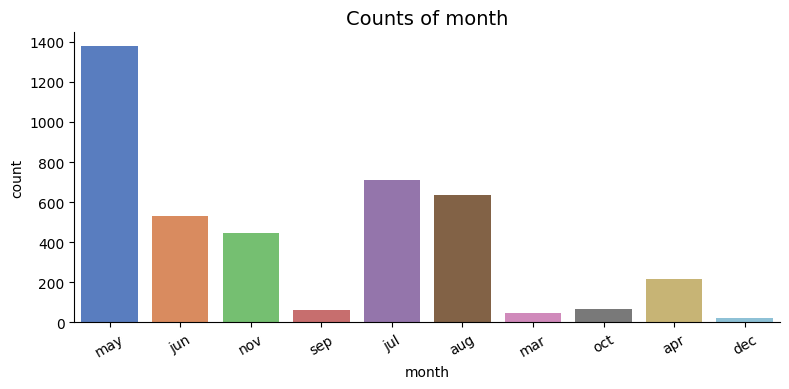

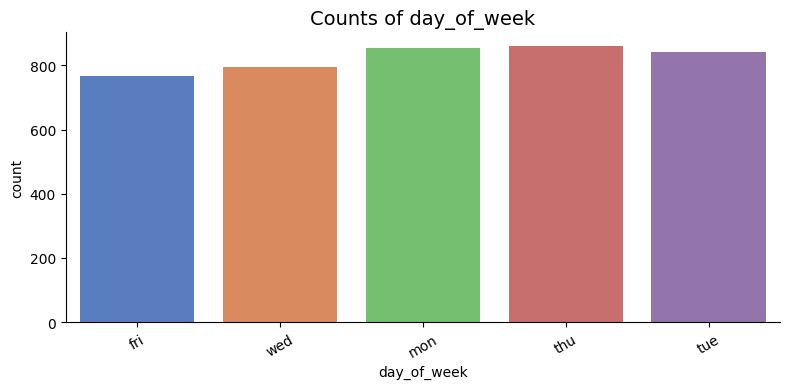

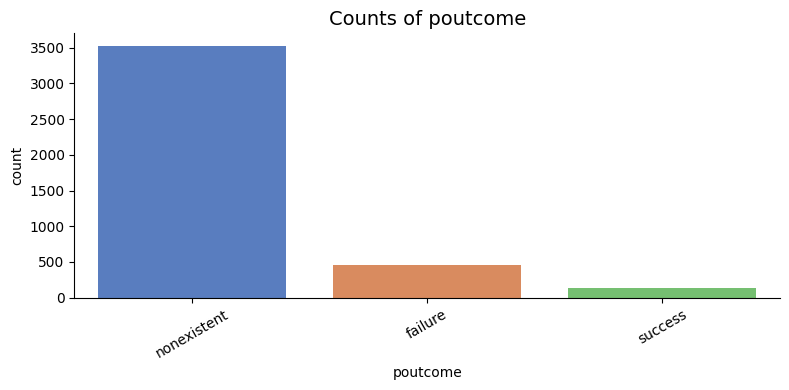

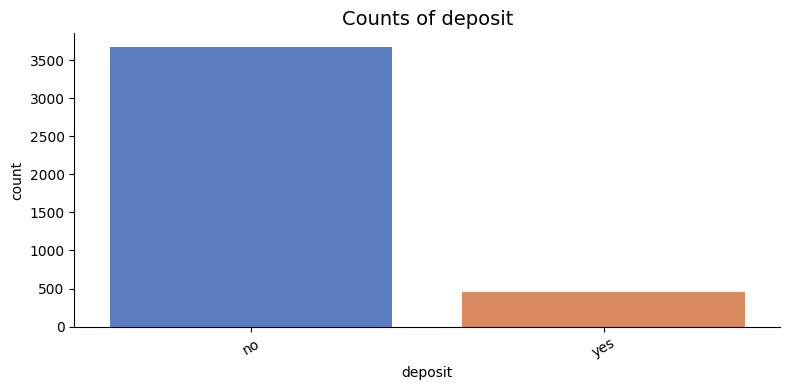

In [19]:
#Visualizing Categorial Data using Barplot

for col in cat_cols:
    sns.catplot(data=df, x=col, kind="count", palette="muted", height=4, aspect=2)
    plt.title(f'Counts of {col}', fontsize=14)
    plt.xticks(rotation=30)
    plt.tight_layout()


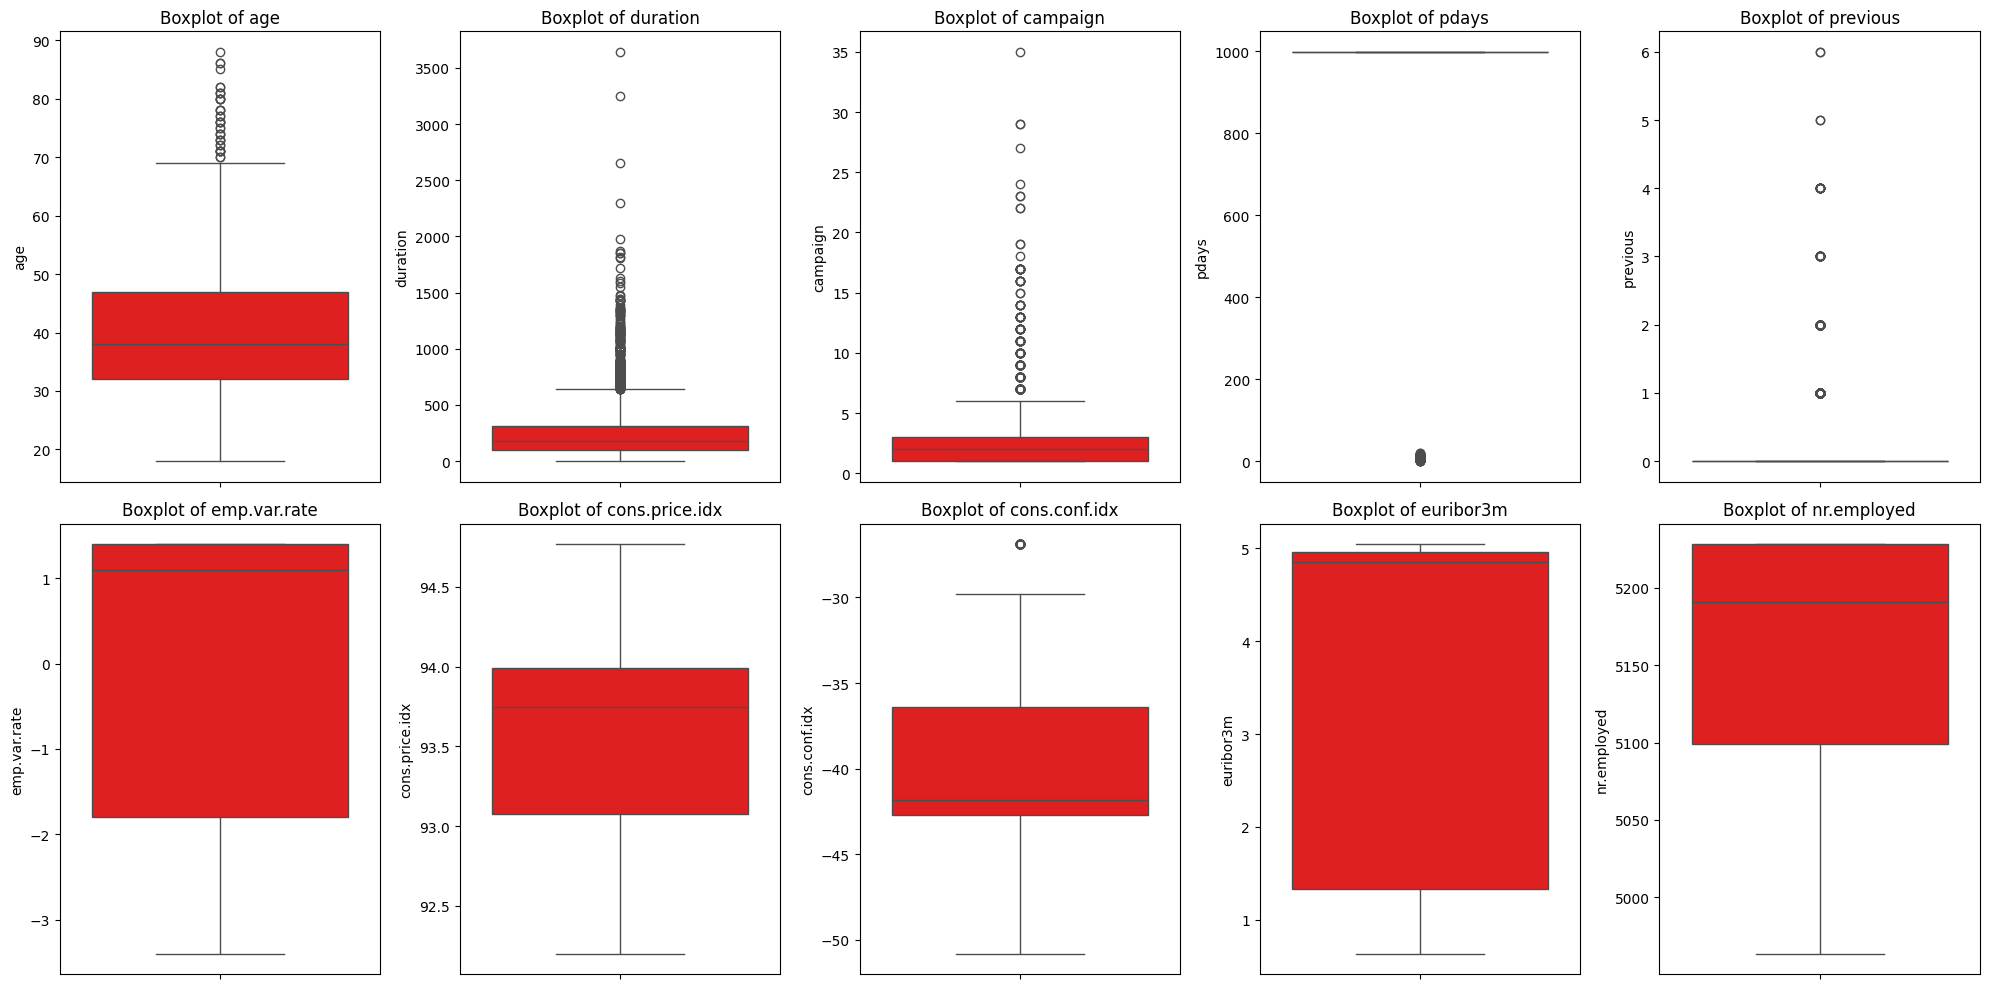

In [20]:

num_cols = df.select_dtypes(include=['number']).columns  
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  

for ax, col in zip(axes.flatten(), num_cols):
    sns.boxplot(data=df, y=col, ax=ax, color='red')
    ax.set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


# Removing Outliers

In [21]:


columns = ['age', 'campaign', 'duration']
df_cleaned = df.copy()

for col in columns:
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

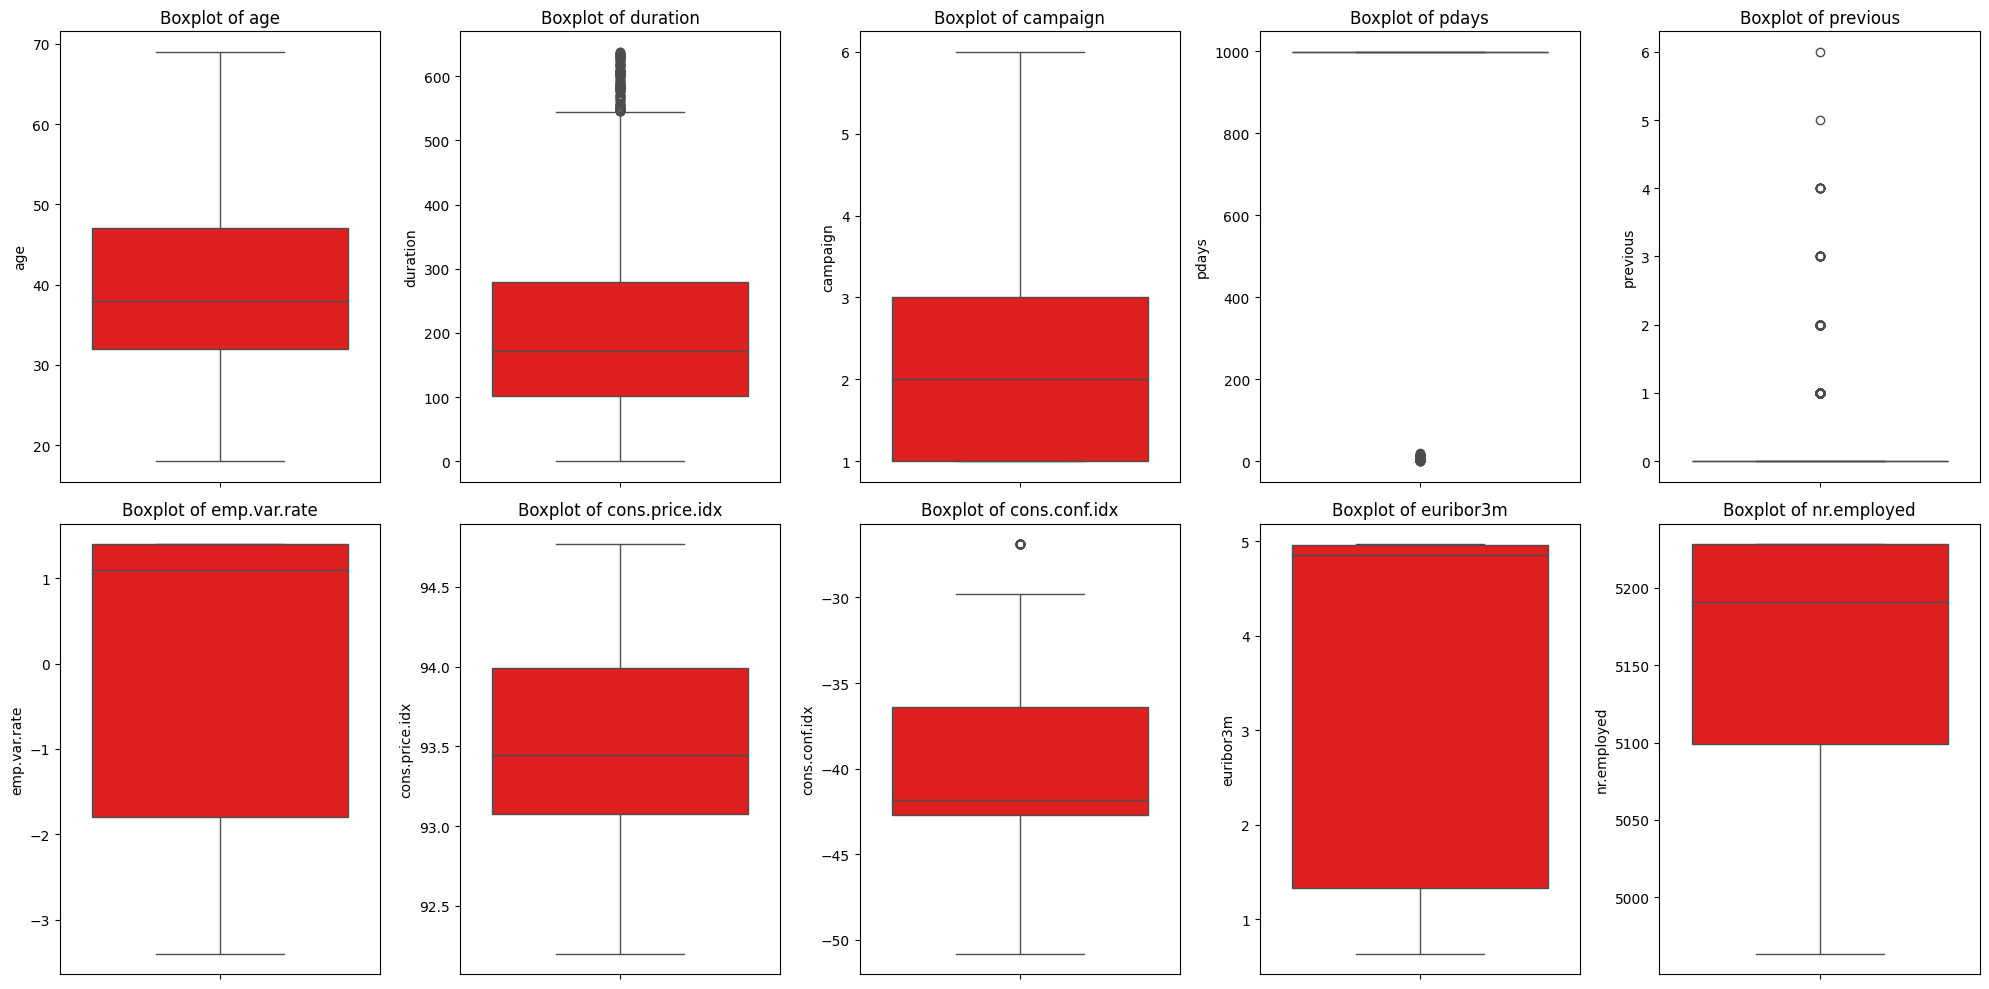

In [22]:
#Plotting Boxplot after removing outliners

num_cols = df_cleaned.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.boxplot(data=df_cleaned, y=col, ax=ax, color='red')
    ax.set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

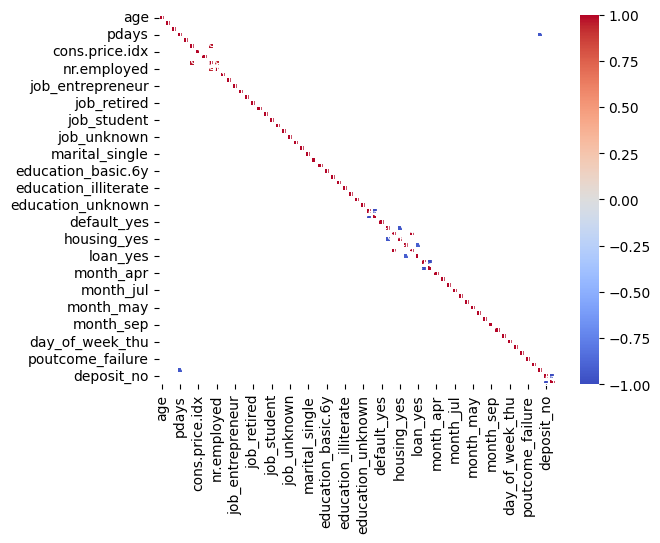

In [23]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_cleaned)

# Calculate correlation
corr = df_encoded.corr()

# Filter out correlations below 0.90
high_corr = corr[abs(corr) >= 0.90]

# Plot the heatmap
sns.heatmap(high_corr, annot=True, cmap='coolwarm', linewidths=0.2)
plt.show()

In [24]:
#Feature selection using Correlation
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [25]:
df1 = df_cleaned.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [26]:
df1.drop(high_corr_cols,inplace = True,axis = 1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')

In [27]:
df1.shape

(3569, 18)

### Label Encoding

In [28]:
#Coversion of catogorial columns into numerical columns using label encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,12,1,1,2,0,2,0,0,6,0,474,1,18,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,343,3,18,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,18,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,18,0,1,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,18,0,1,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,50,0,18,0,1,17,6,0
4115,21,0,1,3,0,2,0,1,3,0,216,0,18,0,1,17,6,0
4116,9,8,2,3,0,0,0,0,6,1,61,1,18,1,0,8,4,0
4117,40,0,1,3,0,0,0,0,1,0,509,0,18,0,1,13,17,0


In [29]:
df_encoded['deposit'].value_counts()

deposit
0    3291
1     278
Name: count, dtype: int64

In [30]:
#Selecting Independent and Dependent Variables

x = df_encoded.drop('deposit',axis = 1)
y = df_encoded['deposit']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(3569, 17)
(3569,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Training and Testing Dataset

In [31]:
from sklearn.model_selection import train_test_split
print(3569*0.25)

892.25


In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25 , random_state = 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2676, 17)
(893, 17)
(2676,)
(893,)


In [33]:
#Function to compute Confusion Matrix,Classification Report and to generate training and testing scores

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print("\nAccuracy Score : ",acc)
    cm = confusion_matrix(y_test,y_pred)
    print("\nConfusion Matrix : ",cm)
    print("\nClassification report\n",classification_report(y_test,y_pred))
    
def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print("\nTraining Score : ",train_score)
    print("\nTesting Score : ",test_score)

### Decision Tree Classifier

In [34]:
#Importing Decision tree Library
from sklearn.tree import DecisionTreeClassifier

#Building Decision Tree Classifier Model
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [35]:
DecisionTreeClassifier(max_depth=5, min_samples_split=10)


DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [36]:
#Evaluating Training and Testing Accuracy
mscore(dt)



Training Score :  0.9428251121076233

Testing Score :  0.9316909294512878


In [37]:
#Generating Predictions
ypred_dt = dt.predict(x_test)
print(ypred_dt)


[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [38]:
#Evaluate the Model ---- Confusion Matrix , Classification report , Accuracy
eval_model(y_test,ypred_dt)



Accuracy Score :  0.9316909294512878

Confusion Matrix :  [[810  12]
 [ 49  22]]

Classification report
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       822
           1       0.65      0.31      0.42        71

    accuracy                           0.93       893
   macro avg       0.80      0.65      0.69       893
weighted avg       0.92      0.93      0.92       893



In [39]:
#Plotting Decision Tree
from sklearn.tree import plot_tree

cn = ['no','yes'] #class names
fn = x_train.columns #feature names
print(cn)
print(fn)


['no', 'yes']
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')


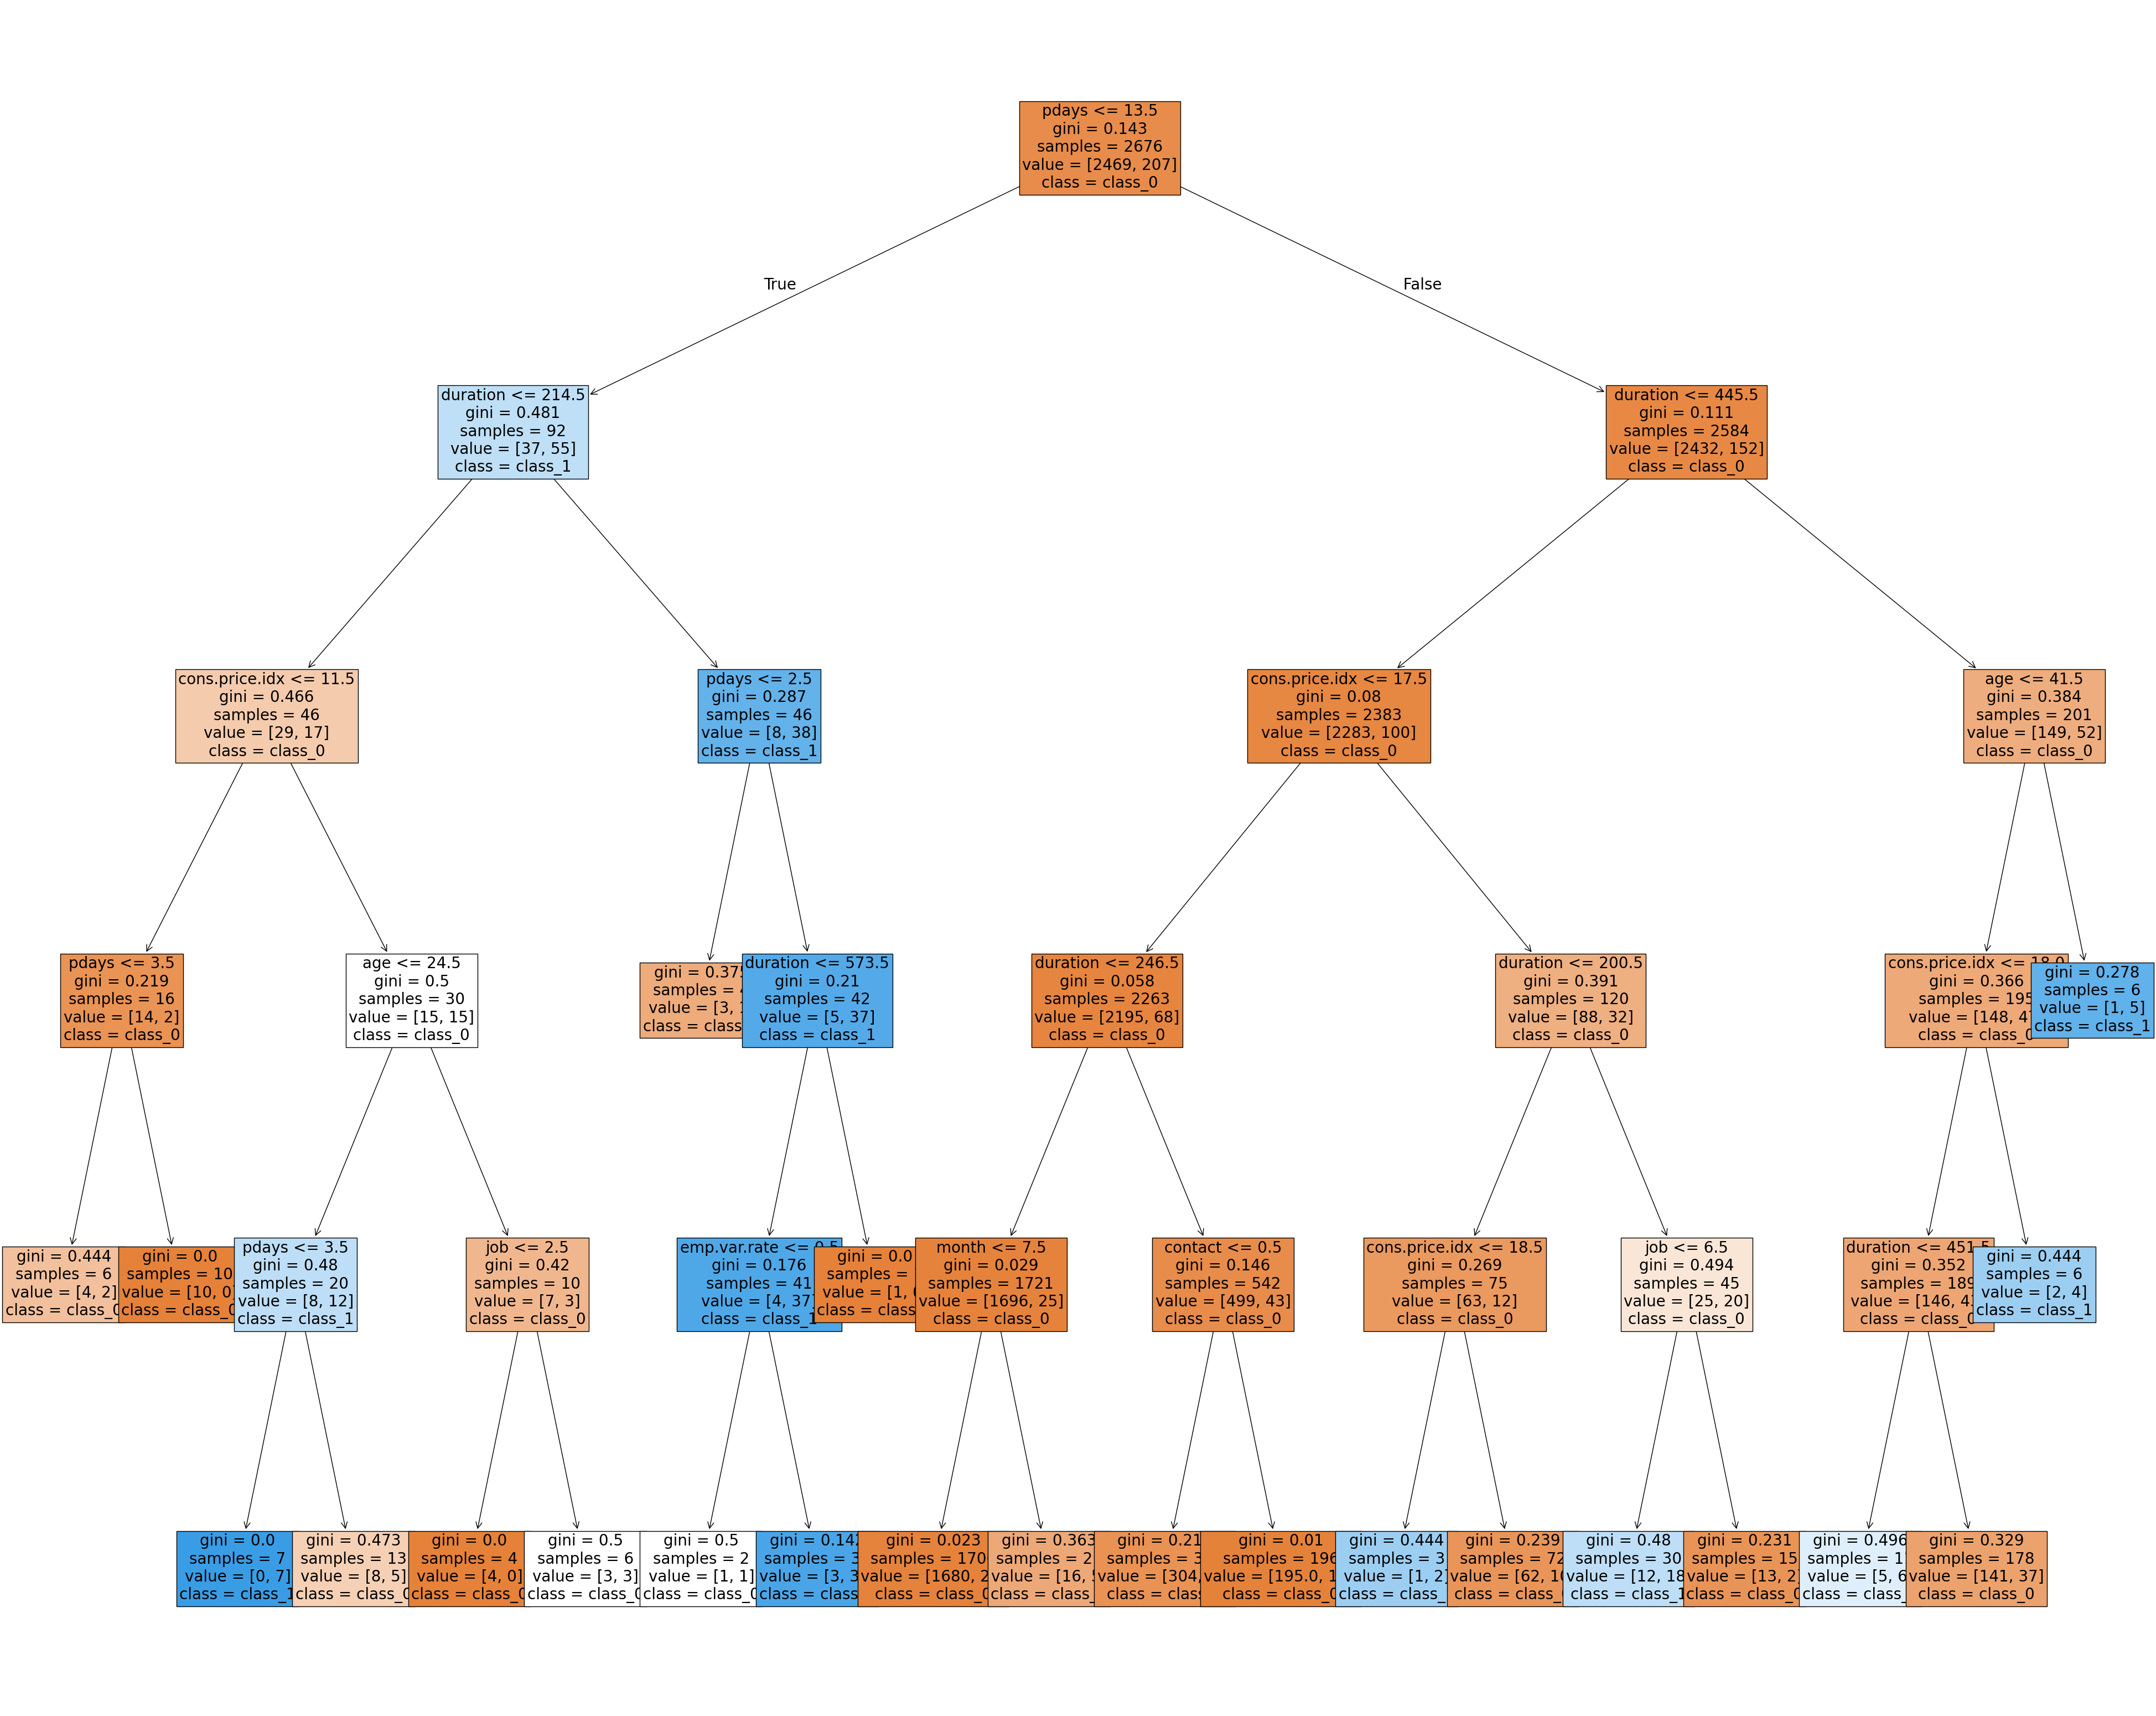

In [40]:
feature_names = df.columns.tolist()
class_names = ["class_0","class_1"]
plt.figure(figsize = (50,40))
plot_tree(dt,feature_names=feature_names,class_names=class_names,filled = True,fontsize = 20)
plt.show()


### Decision Tree Classifier 2 (using Entropy Criteria)

In [41]:
#Building Decision Tree Classifier Model
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [42]:
#Evaluating Training and Testing Accuracy
mscore(dt1)


Training Score :  0.9398355754857997

Testing Score :  0.9417693169092946


In [43]:
#Generating Predictions
ypred_dt1 = dt1.predict(x_test)
print(ypred_dt1)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [44]:
#Evaluate the Model ---- Confusion Matrix , Classification report , Accuracy
eval_model(y_test,ypred_dt1)


Accuracy Score :  0.9417693169092946

Confusion Matrix :  [[815   7]
 [ 45  26]]

Classification report
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       822
           1       0.79      0.37      0.50        71

    accuracy                           0.94       893
   macro avg       0.87      0.68      0.73       893
weighted avg       0.93      0.94      0.93       893



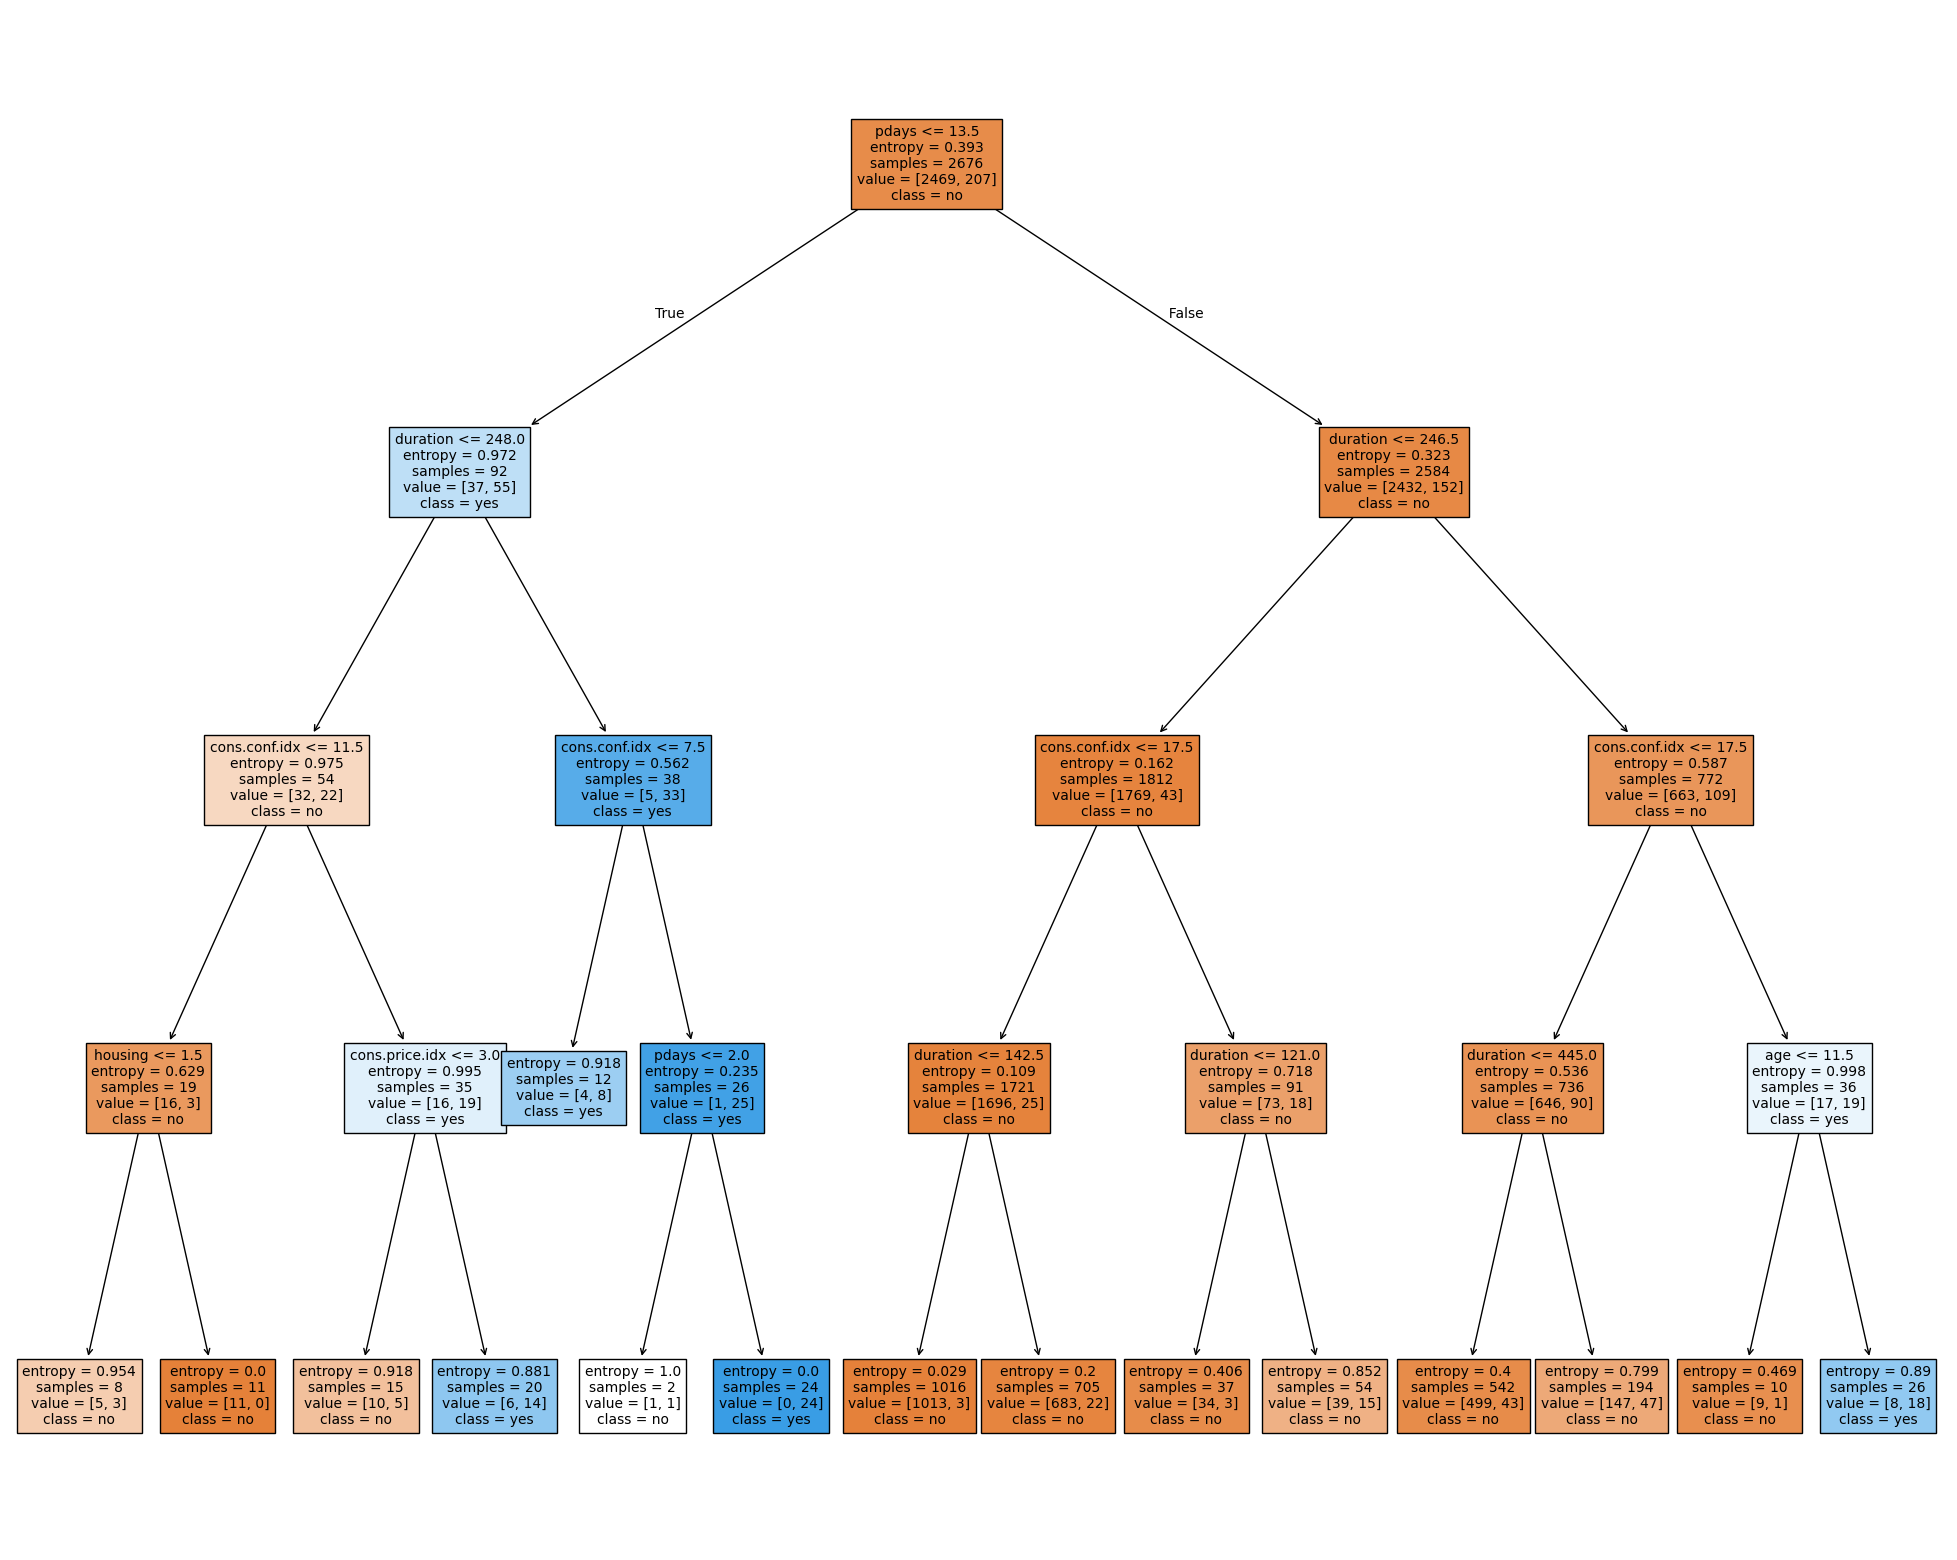

In [45]:
#Plotting Decision classifier tree
plt.figure(figsize = (25,20))
plot_tree(dt1,feature_names=fn.tolist(),class_names=cn,filled = True,fontsize = 10)
plt.show()